# This program is based on :
- https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft, fftfreq
import matplotlib.gridspec as gridspec
from scipy.signal import welch
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf
import librosa
import pywt

In [3]:
DURATION_TIME = 10
N = 1000
T = DURATION_TIME / N
F = 1/T
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]

In [135]:
def fourier_transform(signal, T, N):
    # 1/2*T is half of frequency sampling rate (nyquist rate)
    t = np.linspace(0.0, 1.0/(2.0*T), N//2)
    t_fftfreq = fftfreq(N, 1 / N)
    print(f't : {len(t)}, fftfreq t : {len(t_fftfreq)}')
    # 2/n is normalize data
    fft_value = 2.0/N * np.abs(fft(signal)[0:N//2])
    return t, fft_value

def fourier_transform2(signal, sampling_rate):
    n = len(signal)
    
    # Calculate the frequency resolution
    freq_resolution = sampling_rate / n
    
    # Calculate the Fourier Transform
    fourier_transform = np.fft.fft(signal)
    
    # Calculate the corresponding frequency values
    frequencies = np.arange(0, n) * freq_resolution
    
    return frequencies, fourier_transform

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

In [5]:
t = np.linspace(0, DURATION_TIME, N)
signal_data = {}


for i in range(0, len(amplitudes)):
    signal_data[f"signal_{amplitudes[i]}A_{frequencies[i]}Hz"] = amplitudes[i] * np.sin(2*np.pi*frequencies[i]*t)

mixed_sum = [0] * len(signal_data[f'signal_{amplitudes[0]}A_{frequencies[0]}Hz'])  

for key in signal_data:
    array = signal_data[key]
    for i in range(len(array)):
        mixed_sum[i] += array[i]

signal_data['mixed'] = mixed_sum


# Fourier Transform

signal_4A_6.5Hz
signal_6A_5Hz
signal_8A_3Hz
signal_10A_1.5Hz
signal_14A_1Hz


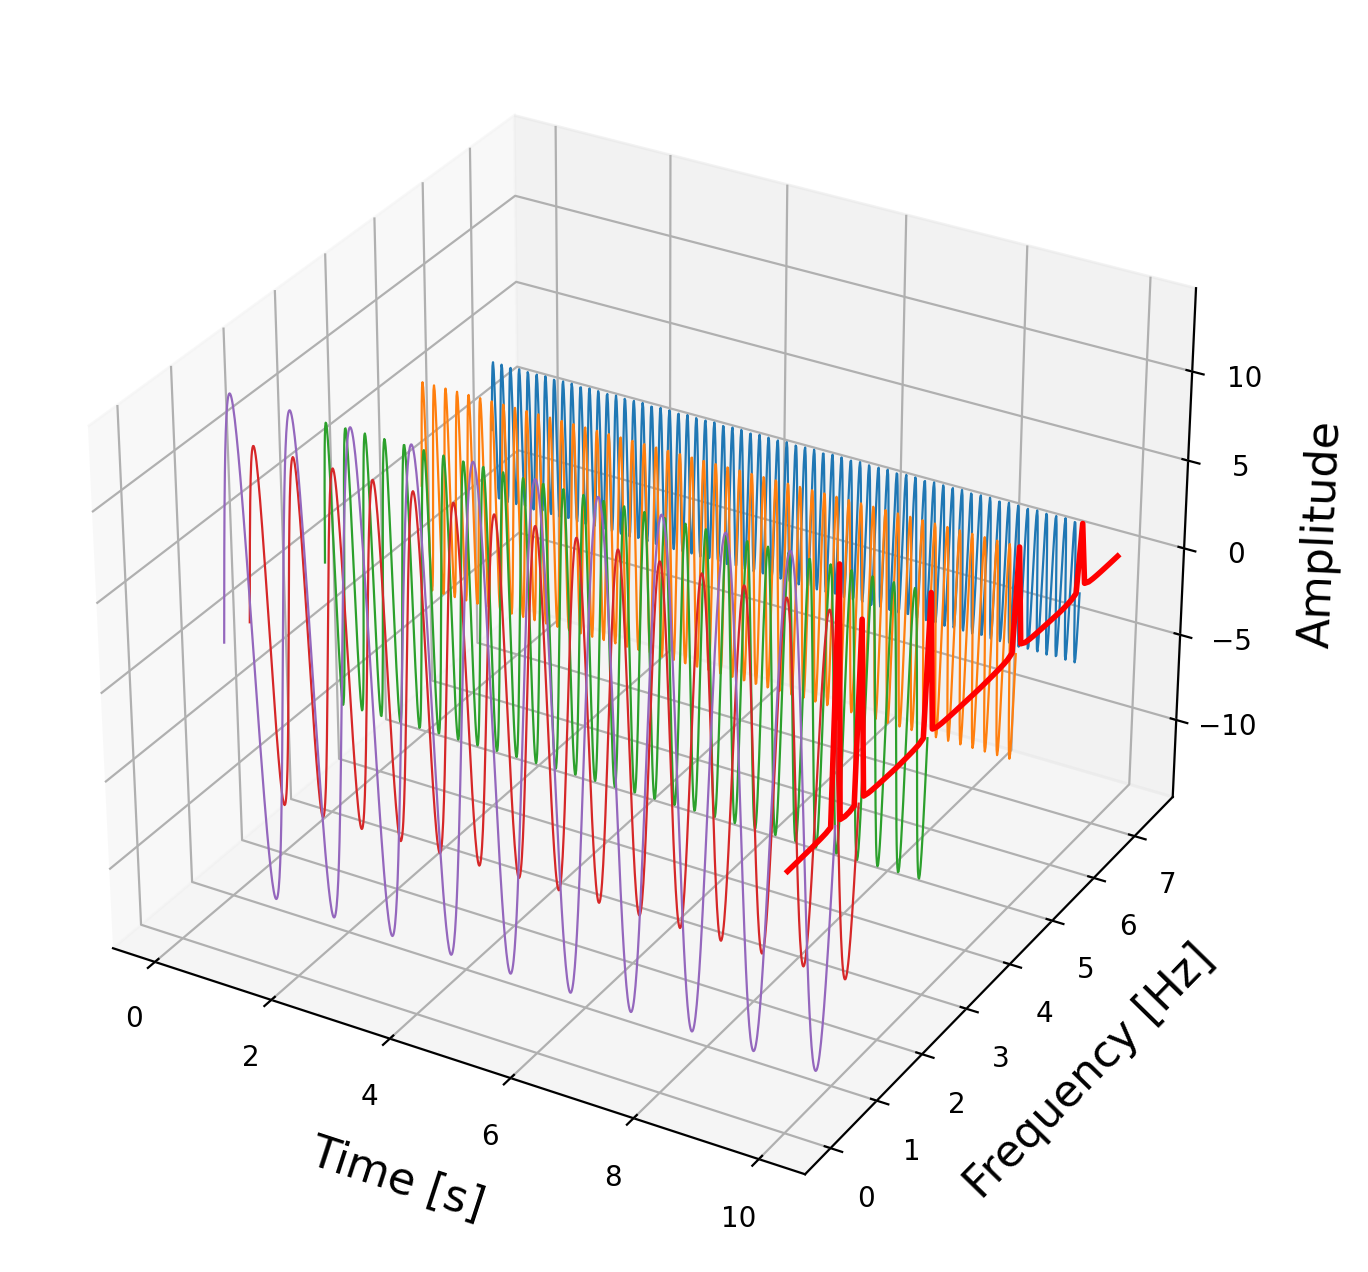

In [6]:
fig = plt.figure(figsize=(8,8), dpi = 200)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)

count = 0
for i in signal_data.keys():

    if i == 'mixed':
        x_axis, fourier = fourier_transform(signal_data['mixed'], T, N)
        ax.plot(list([10] * 75), list(x_axis)[:75], list(fourier)[:75], linewidth=2, color='red')
        pass

    else:
        # print(f"x : {len(list(t))}, y : {len(frequencies[count] * len(signal_data['signal_4A_6.5Hz']))}, z : {len(signal_data[i])}")
        ax.plot(
            list(t),
            [frequencies[count]] * len(signal_data['signal_4A_6.5Hz']),
            signal_data[i],
            linewidth = 0.8
        )
        count += 1

        print(i)

# Power Spectral Density

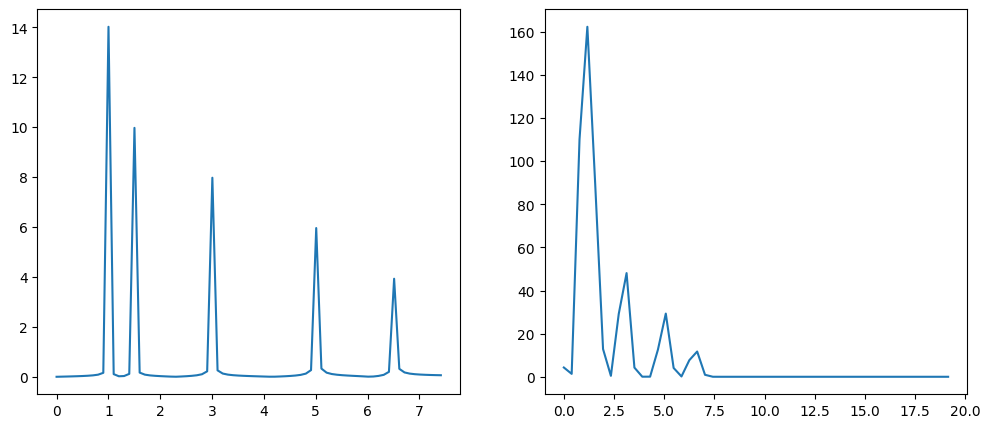

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

f_values, psd_values = welch(signal_data['mixed'], fs=F)

ax[0].plot(x_axis[:75], fourier[:75])
ax[1].plot(f_values[:50], psd_values[:50])

# The Disadvantages of Fourier

t : 50000, fftfreq t : 100000
t : 50000, fftfreq t : 100000


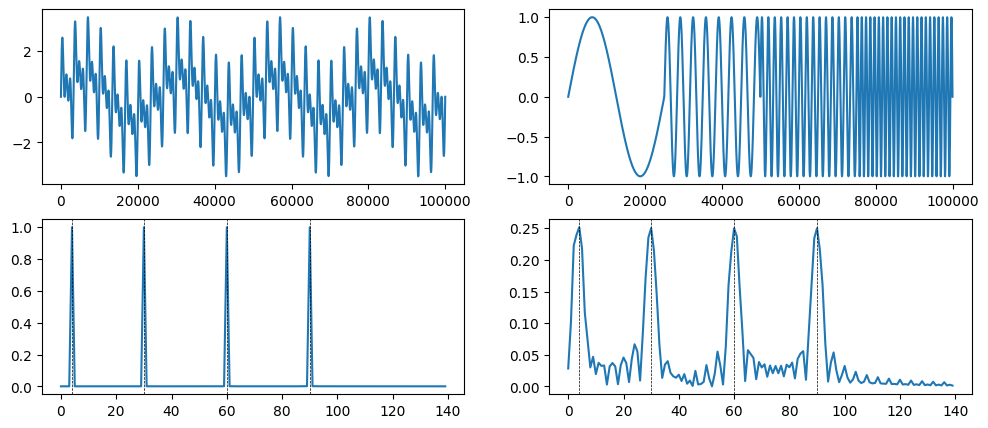

In [142]:
sample_rate = 100000 # Hz
duration = 1
frequencies = [4, 30, 60, 90]
t = np.linspace(0, duration, duration*sample_rate)

mixed_signal_sum = 0
mixed_signal_concatenate = []
count = 0

for i in frequencies:
    mixed_signal_sum += np.sin(2*np.pi*i*t)
    mixed_signal_concatenate.append(np.sin(2*np.pi*i*np.linspace(0, duration/4, (duration*sample_rate)//4)))

mixed_signal_concatenate = np.concatenate(mixed_signal_concatenate)
t_mixed_sum, fourier_mixed_signal_sum = fourier_transform(mixed_signal_sum, 1/(sample_rate*duration), sample_rate)
t_mixed_concantenate, fourier_mixed_signal_concatenate = fourier_transform(mixed_signal_concatenate, 1/(sample_rate*duration), sample_rate)

fig, ax = plt.subplots(2, 2, figsize=(12,5))
ax[0,0].plot(mixed_signal_sum, label='Mixed sum signal')
ax[0,1].plot(mixed_signal_concatenate, label='Concentenate sum signal')
ax[1,0].plot(t_mixed_sum[:140], fourier_mixed_signal_sum[:140])
ax[1,1].plot(t_mixed_concantenate[:140], fourier_mixed_signal_concatenate[:140])

for i in frequencies:
    for j in range(0,2):
        ax[1,j].axvline(i, 0, 1, linewidth=0.5, linestyle='--', color='k')



# Short Fourier Transform

g:\Program\All\adaptive-modulation-recognition\env\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 1000 is greater than input length  = 140, using nperseg = 140
  .format(nperseg, input_length))


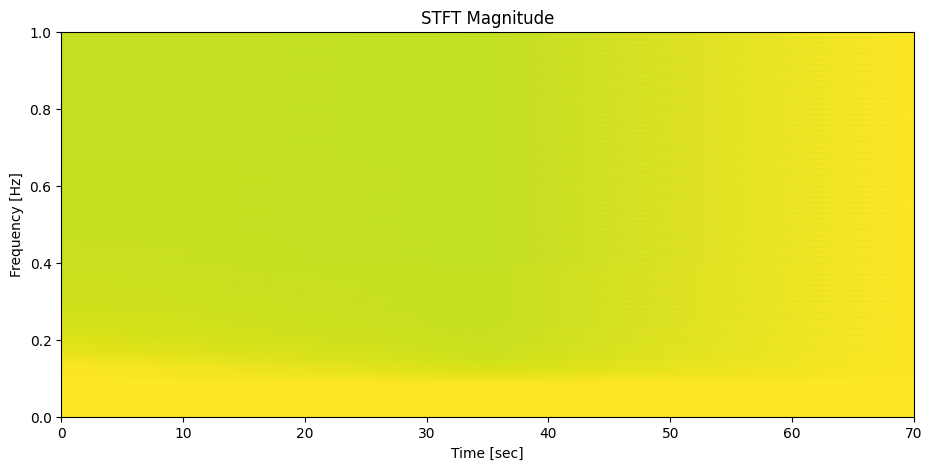

In [156]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

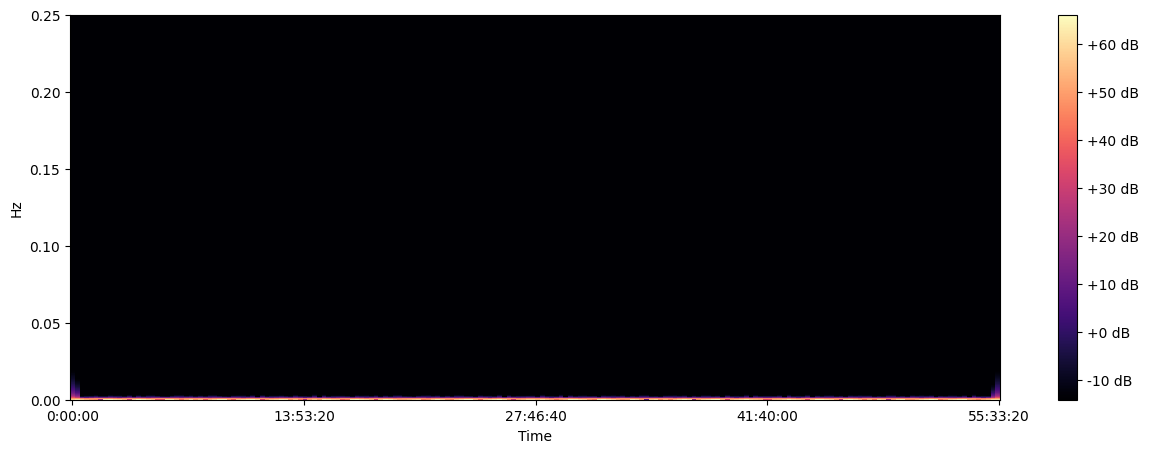

In [163]:
hop_length = 512
n_fft = 2048
X = librosa.stft(mixed_signal_sum, n_fft=n_fft, hop_length=hop_length)
plt.figure(figsize=(15, 5))
S = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(S, sr=0.5, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')


# Wavelet Transform

In [167]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


In [170]:
pywt.ContinuousWavelet()

ValueError: Unknown wavelet name '', check wavelist() for the list of available builtin wavelets.